In [9]:
import pandas as pd

df = pd.read_csv("../DATA/calonpembelimobil.csv")

df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


# Data Preprocessing

In [10]:
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)

df.drop(columns=["ID"], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Usia            1000 non-null   int64
 1   Status          1000 non-null   int64
 2   Kelamin         1000 non-null   int64
 3   Memiliki_Mobil  1000 non-null   int64
 4   Penghasilan     1000 non-null   int64
 5   Beli_Mobil      1000 non-null   int64
dtypes: int64(6)
memory usage: 47.0 KB


# Seaborn Visualization

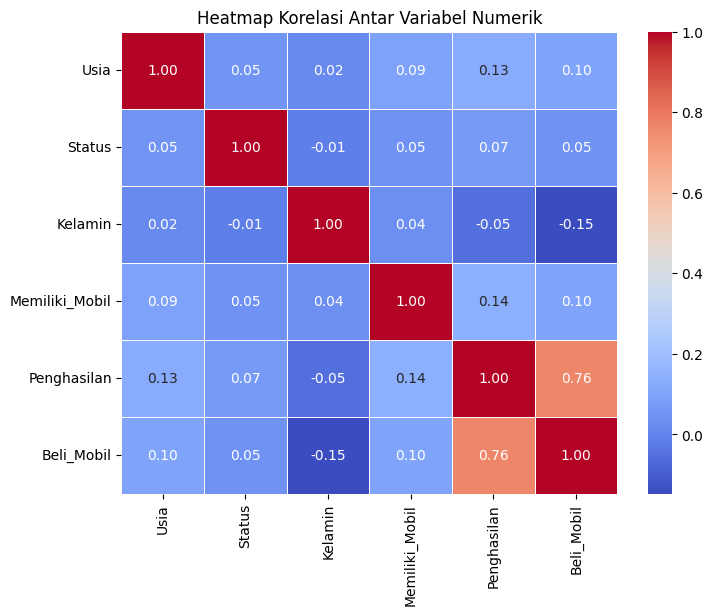

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

# Pembagian Dataset

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Beli_Mobil"])
y = df["Beli_Mobil"]

print("x shape:", X.shape)
print("y shape:", y.shape)

x shape: (1000, 5)
y shape: (1000,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (800, 5) (800,)
Testing set: (200, 5) (200,)


In [14]:
feature_num = ["Penghasilan"]
target = "Beli_Mobil"


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), feature_num),
        ("bin", "passthrough", feature_num),
    ],
    remainder="drop"
)

model = LogisticRegression(
    max_iter=1000, solver="lbfgs", class_weight="balanced", random_state=42
)

clf = Pipeline([
    ("preprocess", preprocess),
    ("model", model),
])

clf.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('bin', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_prob)

print("Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Model Evaluation:
Accuracy: 0.9150
Precision: 0.9741
Recall: 0.8898
F1 Score: 0.9300
ROC AUC: 0.9784


In [17]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import numpy as np

# Classification Report
print(classification_report(
    y_test, y_pred,
    target_names=["Tidak Beli Mobil", "Beli Mobil"],
    zero_division=0
))

# Cross Validation
scores = cross_val_score(clf, X, y, cv=5)
print(f"Skor tiap fold: {scores}")
print(f"Rata-rata akurasi: {np.mean(scores):.4f}")
print(f"Standar deviasi: {np.std(scores):.4f}")

                  precision    recall  f1-score   support

Tidak Beli Mobil       0.83      0.96      0.89        73
      Beli Mobil       0.97      0.89      0.93       127

        accuracy                           0.92       200
       macro avg       0.90      0.92      0.91       200
    weighted avg       0.92      0.92      0.92       200

Skor tiap fold: [0.795 0.935 0.965 0.98  0.965]
Rata-rata akurasi: 0.9280
Standar deviasi: 0.0681


In [18]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import numpy as np

# Classification Report
print(classification_report(
    y_test, y_pred,
    target_names=["Tidak Beli Mobil", "Beli Mobil"],
    zero_division=0
))

# Cross Validation
scores = cross_val_score(clf, X, y, cv=5)
print(f"Skor tiap fold: {scores}")
print(f"Rata-rata akurasi: {np.mean(scores):.4f}")
print(f"Standar deviasi: {np.std(scores):.4f}")

                  precision    recall  f1-score   support

Tidak Beli Mobil       0.83      0.96      0.89        73
      Beli Mobil       0.97      0.89      0.93       127

        accuracy                           0.92       200
       macro avg       0.90      0.92      0.91       200
    weighted avg       0.92      0.92      0.92       200

Skor tiap fold: [0.795 0.935 0.965 0.98  0.965]
Rata-rata akurasi: 0.9280
Standar deviasi: 0.0681


In [19]:
import numpy as np
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    clf, X, y, cv=5
)

print(f"Skor tiap fold: {scores}")
print(f"Rata-rata akurasi: {np.mean(scores):.4f}")
print(f"Standar deviasi: {np.std(scores):.4f}")

Skor tiap fold: [0.795 0.935 0.965 0.98  0.965]
Rata-rata akurasi: 0.9280
Standar deviasi: 0.0681


# Prediksi Data Baru

In [20]:
new_data = pd.DataFrame({
    'Penghasilan': [30_000],
})

predictions = clf.predict(new_data)
probabilities = clf.predict_proba(new_data)[:, 1]

result = new_data.copy()
result['Prediksi'] = predictions
result['Probabilitas'] = probabilities

result

,Penghasilan,Prediksi,Probabilitas
0,30000,1,1.0
